## Equivalent Baseband Signal Model

Communication occurs in the frequency band $[f_c-\frac{W}{2},f_c+\frac{W}{2}]$, but signal processing is performed in the baseband $[-\frac{W}{2},\frac{W}{2}]$.

- At the transmitter, the final function is to **up-convert** the signal to the passband for transmission via the antenna, 

- At the receiver, the first function is to **down-convert** the received signal from the antenna to the baseband.
- Signal processing is usually performed on a discrete version of the signal.
- Therefore, it is necessary to have a discrete baseband representation of the transmitted passband signals and the transmission channel.

### Fourier Transform $ S(f) $ of a Band-Limited Signal $ s(t) $

The signal $s(t)$ with Fourier Transform (FT) $S(f)$ is band-limited to $[f_c-\frac{W}{2},f_c+\frac{W}{2}]$

Given that the signal $ s(t) $ is band-limited to the frequency range $[f_c - \frac{W}{2},\, f_c + \frac{W}{2}]$, its Fourier Transform $ S(f) $ can be expressed as:

$$
\boxed{
S(f) = 
\begin{cases} 
    S(f) & \text{for } f_c - \frac{W}{2} \leq f \leq f_c + \frac{W}{2} \\
    0 & \text{otherwise}
\end{cases}
}
$$

**Alternative Representation Using the Rectangular Function:**

$$
S(f) = S(f) \cdot \text{rect}\left( \frac{f - f_c}{W} \right)
$$

where the rectangular function $\text{rect}\left( \frac{f - f_c}{W} \right)$ is defined as:

$$ 
\text{rect}\left( \frac{f - f_c}{W} \right) = 
\begin{cases} 
    1 & \text{if } |f - f_c| \leq \frac{W}{2} \\
    0 & \text{otherwise}
\end{cases}
$$

- **Non-Zero Region:** $ S(f) $ is non-zero only within $[f_c - \frac{W}{2},\, f_c + \frac{W}{2}]$.
- **Zero Outside:** $ S(f) = 0 $ outside this frequency band.

This representation ensures that all signal processing can be efficiently performed in the baseband $[- \frac{W}{2},\, \frac{W}{2}]$ after down-conversion.

#### Example: Band-Limiting a Signal with Symmetric Filtering


1. **Original Signal (Time Domain)**:
    - Displays the composite signal containing all five sine wave components.
    - The signal exhibits complex behavior due to the combination of multiple frequencies.

2. **Original Signal (Frequency Domain)**:
    - Shows distinct peaks at `-100 Hz`, `10 Hz`, `190 Hz`, `300 Hz`, and `350 Hz`.
    - These peaks correspond to the frequency components of the original signal.

3. **Band-Limited Signal (Time Domain)**:
    - After applying the symmetric band-limiting filter, the time-domain signal appears smoother.
    - This is because the high-frequency components (`300 Hz` and `350 Hz`) have been removed.

4. **Band-Limited Signal (Frequency Domain)**:
    - Only retains the `10 Hz` and `190 Hz` components within the `[0 Hz, 200 Hz]` band.
    - The unwanted frequencies (`-100 Hz`, `300 Hz`, `350 Hz`) are effectively attenuated to zero.

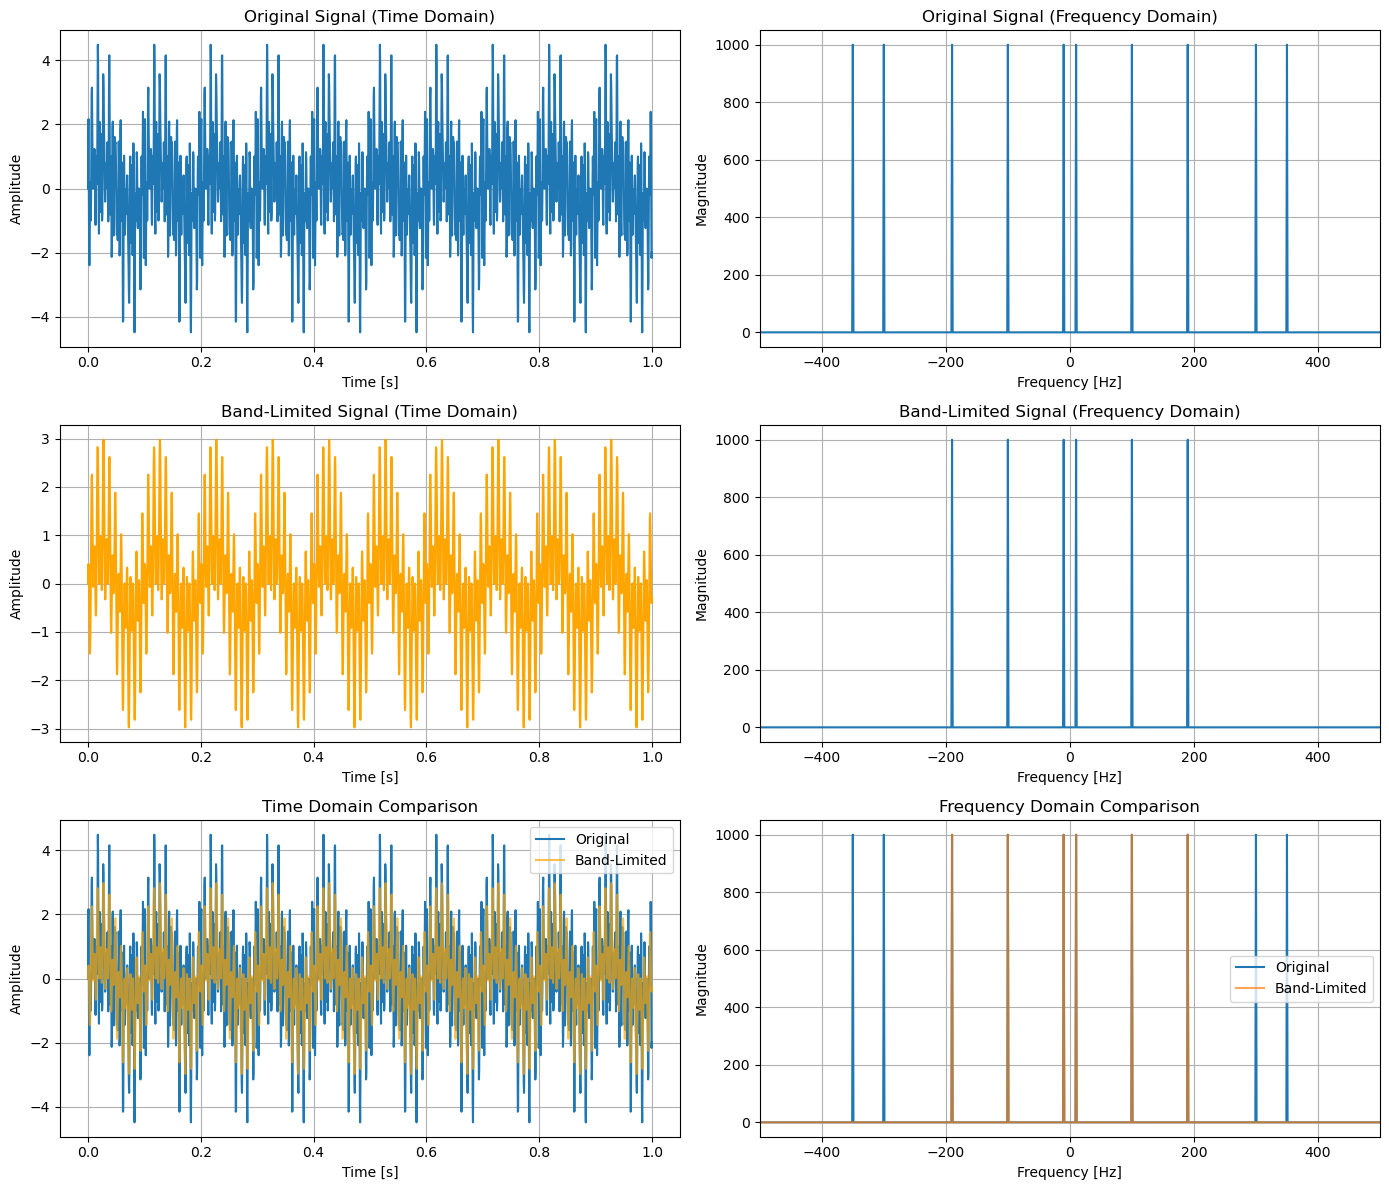

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifftshift, fftfreq, ifft

# Sampling parameters
Fs = 2000  # Sampling frequency in Hz
T = 1 / Fs  # Sampling interval in seconds
L = 2000    # Number of samples (1 second of data)
t = np.arange(L) * T  # Time vector

# Signal parameters
f_c = 100  # Carrier frequency in Hz
W = 200    # Bandwidth in Hz

# Define frequency components
# Frequencies within the band
f1 = f_c - W/2 + 10  # 10 Hz above lower band edge => 0 +10 = 10 Hz
f2 = f_c + W/2 - 10  # 10 Hz below upper band edge => 200 -10 = 190 Hz

# Frequencies outside the band
f3 = f_c - W        # -100 Hz (below lower band edge)
f4 = f_c + W        # 300 Hz (above upper band edge)
f5 = f_c + W + 50   # 350 Hz (well above upper band edge)

# Create the composite signal
s = (np.sin(2 * np.pi * f1 * t) +
     np.sin(2 * np.pi * f2 * t) +
     np.sin(2 * np.pi * f3 * t) +
     np.sin(2 * np.pi * f4 * t) +
     np.sin(2 * np.pi * f5 * t))

# Compute FFT
S = fft(s)
S_shifted = fftshift(S)  # Shift zero frequency component to center

# Frequency vector
freqs = fftshift(fftfreq(L, T))

# Define the rectangular function
def rect(x):
    return np.where(np.abs(x) <= 0.5, 1, 0)

# Calculate window width in normalized frequency
# Since W is in Hz, normalized frequency (cycles/sample) is W / Fs
normalized_W = W / Fs  # e.g., 200 / 2000 = 0.1

# Define the window centered at f_c and -f_c for symmetry
window = rect((freqs - f_c) / W) + rect((freqs + f_c) / W)

# Apply the window to the Fourier Transform
S_band_limited = S_shifted * window

# Shift back the filtered spectrum for IFFT
S_band_limited_unshifted = ifftshift(S_band_limited)

# Inverse FFT to get the time-domain band-limited signal
s_band_limited = np.real(ifft(S_band_limited_unshifted))

# Plot settings
plt.figure(figsize=(14, 12))

# 1. Original Signal (Time Domain)
plt.subplot(3, 2, 1)
plt.plot(t, s)
plt.title('Original Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# 2. Original Signal (Frequency Domain)
plt.subplot(3, 2, 2)
plt.plot(freqs, np.abs(S_shifted))
plt.title('Original Signal (Frequency Domain)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-500, 500)
plt.grid(True)

# 3. Band-Limited Signal (Time Domain)
plt.subplot(3, 2, 3)
plt.plot(t, s_band_limited, color='orange')
plt.title('Band-Limited Signal (Time Domain)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)

# 4. Band-Limited Signal (Frequency Domain)
plt.subplot(3, 2, 4)
plt.plot(freqs, np.abs(fftshift(fft(s_band_limited))))
plt.title('Band-Limited Signal (Frequency Domain)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-500, 500)
plt.grid(True)

# 5. Time Domain Comparison
plt.subplot(3, 2, 5)
plt.plot(t, s, label='Original')
plt.plot(t, s_band_limited, label='Band-Limited', color='orange', alpha=0.7)
plt.title('Time Domain Comparison')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

# 6. Frequency Domain Comparison
plt.subplot(3, 2, 6)
plt.plot(freqs, np.abs(S_shifted), label='Original')
plt.plot(freqs, np.abs(S_band_limited), label='Band-Limited', alpha=0.7)
plt.title('Frequency Domain Comparison')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.xlim(-500, 500)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### Baseband Equivalent Fourier Transform $ S_b(f) $ of $ s(t) $

In communication systems, converting a passband signal $ s(t) $ to its baseband equivalent $ s_b(t) $ simplifies processing by shifting the frequency spectrum around zero. 

Recall that

- Passband Signal $ s(t) $:
  - Frequency Range: $ [f_c - \frac{W}{2},\ f_c + \frac{W}{2}] $
  - Fourier Transform: $ S(f) $

- Baseband Equivalent Signal $ s_b(t) $:
  - Frequency Range: $ \left[-\frac{W}{2},\ \frac{W}{2}\right] $
  - Fourier Transform: $ S_b(f) $

To convert the passband signal $ s(t) $ to its baseband equivalent $ s_b(t) $, we perform **frequency shifting** (down-conversion) and **scaling**.

Mathematically, this process is represented as:

$$
\boxed{
s_b(t) = \sqrt{2}\, s(t) \cdot e^{-j2\pi f_c t}
}
$$

- **Frequency Shifting:** Multiplying by $ e^{-j2\pi f_c t} $ shifts the spectrum of $ s(t) $ down by the carrier frequency $ f_c $.
- **Scaling Factor $ \sqrt{2} $:** Ensures that the power of $ s_b(t) $ matches that of $ s(t) $ after shifting.


The Fourier Transform (FT) of the baseband equivalent signal $ s_b(t) $ is:

$$ 
\boxed{
S_b(f) = 
\begin{cases} 
\sqrt{2}\, S(f + f_c) & f + f_c > 0 \\ 
0 & f + f_c \leq 0 
\end{cases}
}
$$

### Autocorrelation Function

The **autocorrelation function (ACF)** of a signal $ s(t) $, denoted as $ R_s(\tau) $, is a measure of how similar the signal $ s(t) $ is to a time-shifted version of itself. 

It provides insight into the signal’s temporal structure and is used to assess signal periodicity, coherence, and power characteristics over time.

Mathematically, the autocorrelation function $ R_s(\tau) $ is defined as:

$$
R_s(\tau) = \mathbb{E}\{s(t) s^*(t + \tau)\}
$$

where:
- $ \mathbb{E} $ denotes the expected value (for random signals).
- $ s(t) $ is the signal.
- $ s^*(t + \tau) $ is the complex conjugate of the signal at time $ t + \tau $.
- $ \tau $ is the time lag or time shift.

For **deterministic signals**, the autocorrelation function is simply:

$$
R_s(\tau) = \int_{-\infty}^{\infty} s(t) s^*(t + \tau) dt
$$


### Power Spectral Density

The **power spectral density (PSD)** of a signal $ s(t) $, denoted as $ S_s(f) $, describes how the power of the signal is distributed over different frequencies. 

It is a key concept in signal processing, particularly in understanding the frequency content of signals in communication systems.

For a signal $ s(t) $, the PSD $ S_s(f) $ is defined as the Fourier transform of the autocorrelation function of $ s(t) $, $ R_s(\tau) $, as follows:

$$
S_s(f) = \int_{-\infty}^{\infty} R_s(\tau) e^{-j2\pi f \tau} d\tau
$$

Alternatively, for wide-sense stationary signals, if $ s(t) $ has a Fourier Transform $ S(f) $, the PSD can also be expressed in terms of the magnitude of the Fourier Transform:

$$
S_s(f) = |S(f)|^2
$$

where:
- $ S(f) $ is the Fourier Transform of $ s(t) $.
- $ |S(f)|^2 $ represents the power per unit frequency at a given frequency $ f $.

The PSD gives a frequency-domain representation of how the power of $ s(t) $ is distributed across different frequencies. 

### Relationship Between $ S(f) $ and $ S_b(f) $

#### Baseband to Passband Modulation

**Baseband Signal:**

Start with the baseband signal $ s_b(t) $, whose FT is $ S_b(f) $.

**Up-Conversion (Modulation):** 

To transmit $ s_b(t) $ over a carrier frequency $ f_c $, perform modulation by multiplying $ s_b(t) $ with a complex exponential $ e^{j2\pi f_c t} $:

$$
s(t) = \frac{1}{\sqrt{2}} \left[ s_b(t) e^{j2\pi f_c t} + s_b^*(t) e^{-j2\pi f_c t} \right]
$$


- $ s_b(t) e^{j2\pi f_c t} $: Shifts $ s_b(t) $ to the positive frequency band centered at $ f_c $.
- $ s_b^*(t) e^{-j2\pi f_c t} $: Shifts the complex conjugate of $ s_b(t) $ to the negative frequency band centered at $-f_c$.
- The $ \frac{1}{\sqrt{2}} $ factor ensures that the combined signal maintains appropriate power levels.

**Fourier Transform:**

Taking the FT of $ s(t) $:

$$
S(f) = \frac{1}{\sqrt{2}} \left[ S_b(f - f_c) + S_b^*(-f - f_c) \right]
$$

- **FT of $ s_b(t) e^{j2\pi f_c t} $:** Shifts $ S_b(f) $ to $ S_b(f - f_c) $.
- **FT of $ s_b^*(t) e^{-j2\pi f_c t} $:** Shifts $ S_b^*(-f) $ to $ S_b^*(-f - f_c) $.
- Combining both shifted spectra gives the complete passband spectrum.


Thus, we have

$$ \boxed{
S(f) = \frac{1}{\sqrt{2}} \left[ S_b(f - f_c) + S_b^*(-f - f_c) \right]
}
$$

where $S_b^*(\cdot)$ denotes the **complex conjugate** of $S_b(\cdot)$.

**Discussion: Ensuring Real-Valued Signal $ s(t) $**

For $ s(t) $ to be real-valued (as physical signals are), its Fourier Transform must satisfy the Hermitian symmetry property:

$$
S(-f) = S^*(f)
$$

The provided relationship inherently satisfies this property:

$$
\begin{align*}
S(-f) &= \frac{1}{\sqrt{2}} \left[ S_b(-f - f_c) + S_b^*(f - f_c) \right] \\
&= \left[ \frac{1}{\sqrt{2}} \left( S_b(f - f_c) + S_b^*(-f - f_c) \right) \right]^* \\
&= S^*(f)
\end{align*}
$$


### Modulation and Demodulation

We describe the process of **modulating** a complex baseband signal to a real passband signal, $s_b(t) \to s(t)$, and subsequently **demodulating** it back to retrieve the baseband components $s(t) \to s_b(t)$. 

This is fundamental in communication systems where signals are transmitted over carriers and later processed at the receiver.

#### Modulating Baseband Signal to Passband

- The baseband signal's real and imaginary parts independently modulate the cosine and sine carriers.
- The combination results in a real passband signal $ s(t) $ carrying both I and Q information.

a. Starting with the Baseband Signal

- Baseband Signal $ s_b(t) $:
  - Characteristic: Complex-valued signal containing both **In-phase (I)** and **Quadrature (Q)** components.
  - Mathematical Expression: $ s_b(t) = \Re\{s_b(t)\} + j\Im\{s_b(t)\} $
  
- **Carrier Signal:**
  - $ f_c $ (carrier frequency)
  - Mathematical Expression of the Complex Exponential: $ e^{j2\pi f_c t} = \cos(2\pi f_c t) + j\sin(2\pi f_c t) $

b. Mathematical Expression of Modulation

The passband signal $ s(t) $ is obtained by **modulating** the baseband signal $ s_b(t) $ with the carrier:

$$
s(t) = \sqrt{2}\Re\{s_b(t)e^{j2\pi f_ct}\}
$$

where

- $ s_b(t)e^{j2\pi f_ct} $:
  - Operation: Multiplies the complex baseband signal with the carrier, effectively shifting its frequency to the carrier frequency $ f_c $.
  - Result: Produces a complex signal centered around $ f_c $.

- $ \Re\{ \cdot \} $:
  - Operation: Takes the **real part** of the complex product.
  - Purpose: Ensures that the resulting passband signal $ s(t) $ is **real-valued**, as physical signals cannot have imaginary components.

- Scaling Factor $ \sqrt{2} $:
  - Purpose: Maintains the signal's power after modulation. 
  
    When dealing with complex signals, energy is split between the real and imaginary parts, so scaling compensates for this distribution.

c. Expanding the Real Part

Expanding $ \Re\{s_b(t)e^{j2\pi f_ct}\} $ using Euler's formula:

$$
s(t) = \sqrt{2}\Re\{s_b(t)\}\cos(2\pi f_ct) - \sqrt{2}\Im\{s_b(t)\}\sin(2\pi f_ct)
$$

where

- $ \Re\{s_b(t)\} \cos(2\pi f_ct) $:
  - **In-phase Component (I):** The real part of the baseband signal modulates the cosine component of the carrier.

- $ \Im\{s_b(t)\} \sin(2\pi f_ct) $:
  - **Quadrature Component (Q):** The imaginary part of the baseband signal modulates the sine component of the carrier.
  - Negative Sign: Ensures proper phase alignment during modulation.


#### Demodulation of Passband Signal to Baseband Signal

**i. Extracting the In-phase Component $ \Re\{s_b(t)\} $**

$$
\Re\{s_b(t)\} = \sqrt{2} \left[ s(t) \cos(2\pi f_ct) \right] \ast h_{LP}(t)
$$

- **Step-by-Step:**
  1. **Mixing:** Multiply the passband signal $ s(t) $ by $ \cos(2\pi f_ct) $.
  2. **Convolution:** Apply the low-pass filter $ h_{LP}(t) $ to eliminate frequencies outside the baseband, retaining only $ \Re\{s_b(t)\} $.
  3. **Scaling:** The $ \sqrt{2} $ factor restores the original amplitude after modulation.

**ii. Extracting the Quadrature Component $ \Im\{s_b(t)\} $**

$$
\Im\{s_b(t)\} = -\sqrt{2} \left[ s(t) \sin(2\pi f_ct) \right] \ast h_{LP}(t)
$$

- **Step-by-Step:**
  1. **Mixing:** Multiply the passband signal $ s(t) $ by $ \sin(2\pi f_ct) $.
  2. **Convolution:** Apply the low-pass filter $ h_{LP}(t) $ to isolate $ \Im\{s_b(t)\} $.
  3. **Scaling and Sign:** The $ -\sqrt{2} $ factor accounts for the phase shift introduced during modulation, ensuring accurate reconstruction of the quadrature component.

**c. Role of the Low-Pass Filter $ h_{LP}(t) $**

- **Function:** 
  - **Frequency Selection:** Allows only frequencies within $ \left[-\frac{W}{2}, \frac{W}{2}\right] $ to pass, effectively extracting the baseband components.
  
- **Ideal Filter Characteristics:**
  - **Sharp Cutoff:** Perfectly attenuates frequencies outside the passband.
  - **No Distortion:** Preserves the amplitude and phase of frequencies within the passband.

**Summary of Demodulation Process**

To retrieve the baseband components $ \Re\{s_b(t)\} $ and $ \Im\{s_b(t)\} $ from the passband signal $ s(t) $, the following equations are used:

$$ \boxed{
\Re\{s_b(t)\} = \sqrt{2} \left[ s(t) \cos(2\pi f_ct) \right] \ast h_{LP}(t)
}
$$

$$
\boxed{
\Im\{s_b(t)\} = -\sqrt{2} \left[ s(t) \sin(2\pi f_ct) \right] \ast h_{LP}(t)
}
$$

where

- **$ h_{LP}(t) $:** Ideal low-pass filter with bandwidth $ \left[-\frac{W}{2}, \frac{W}{2}\right] $
- **$ \ast $:** Convolution operation

### **Discussions** 

**Why do we use baseband signal instead of passband signal?**

One of the primary reasons for using baseband signal processing is related to the sampling rate requirements of signal processing devices.


**Sampling Rate Considerations**

**a. Nyquist Theorem**
- **Fundamental Principle:** According to the Nyquist-Shannon sampling theorem, to accurately reconstruct a continuous signal from its samples, the sampling rate ($ f_s $) must be at least twice the highest frequency component ($ f_{max} $) of the signal:
  
  $$
  f_s \geq 2 f_{max}
  $$

**b. Passband vs. Baseband Sampling**
- **Passband Signals:**
  - **High $ f_{max} $:** Passband signals are centered around a carrier frequency ($ f_c $) and typically have high-frequency components ($ f_c \pm \frac{W}{2} $, where $ W $ is the bandwidth).
  - **High Sampling Rates Needed:** To satisfy the Nyquist criterion, sampling passband signals directly would require very high sampling rates, especially if $ f_c $ is large. This leads to increased computational complexity and higher demands on analog-to-digital converters (ADCs).

- **Baseband Signals:**
  - **Lower $ f_{max} $:** Baseband signals are centered around zero frequency, containing frequency components only within $\left[-\frac{W}{2}, \frac{W}{2}\right]$.
  - **Reduced Sampling Rates:** Since $ f_{max} $ is significantly lower for baseband signals, the required sampling rate is also lower. This makes digital processing more efficient and less resource-intensive.


- **Efficiency:** Baseband processing allows for lower sampling rates, reducing the burden on ADCs and digital processing hardware.
- **Cost-Effectiveness:** Lower sampling rates lead to cheaper and more power-efficient hardware implementations.
- **Versatility:** Facilitates the use of advanced digital signal processing techniques and supports scalable system designs.

**Complex Conjugate**

**a. Definition**
For any complex number $ z = a + jb $ (where $ a $ and $ b $ are real numbers, and $ j $ is the imaginary unit), the **complex conjugate** of $ z $ is:

$$
z^* = a - jb
$$

**b. Properties**
- **Magnitude:** The magnitude of $ z $ and $ z^* $ are identical.
  
  $$
  |z| = |z^*|
  $$
  
- **Addition:** The complex conjugate of a sum is the sum of the complex conjugates.
  
  $$
  (z_1 + z_2)^* = z_1^* + z_2^*
  $$
  
- **Multiplication:** The complex conjugate of a product is the product of the complex conjugates.
  
  $$
  (z_1 z_2)^* = z_1^* z_2^*
  $$
  
- **Hermitian Symmetry:** For the Fourier Transform of real-valued signals, the Hermitian symmetry property holds:
  
  $$
  S(-f) = S^*(f)
  $$
  
  This implies that the negative frequency components are the complex conjugates of the positive frequency components.


**Role of the Complex Conjugate in Modulation and Demodulation**

**a. Ensuring Real-Valued Time-Domain Signal**

When constructing a passband signal $ s(t) $ from its baseband equivalent $ s_b(t) $, it's crucial to ensure that $ s(t) $ remains **real-valued**. 

**b. Preserving Signal Integrity During Modulation**

The inclusion of the complex conjugate term is essential for **maintaining the integrity** of the original real-valued signal during the modulation (up-conversion) process. 

It ensures that all frequency components are appropriately mirrored, preventing any loss of information and maintaining the signal's real nature.


### Simulation: Baseband Signal to Bandpass Signal

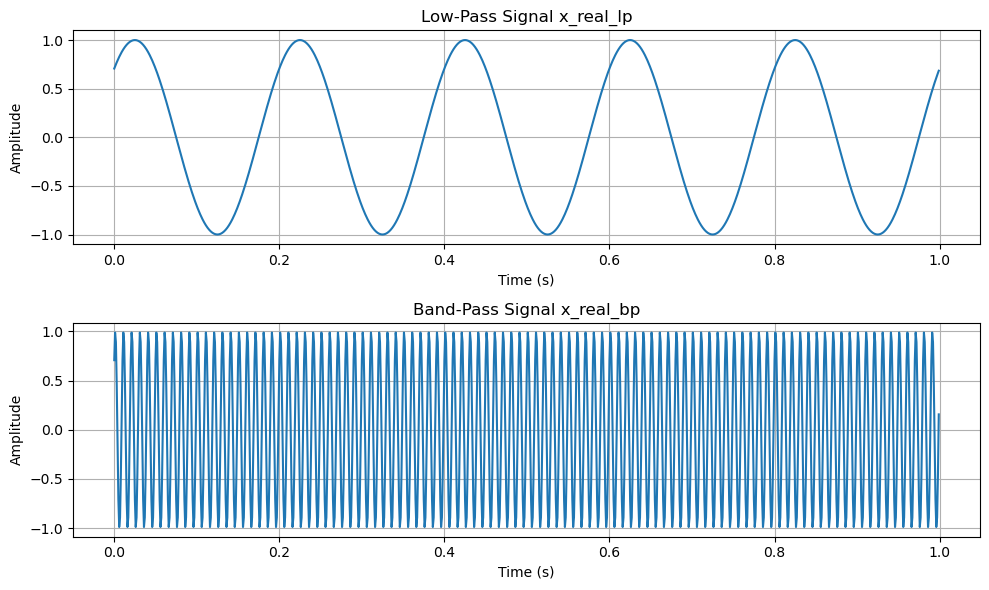

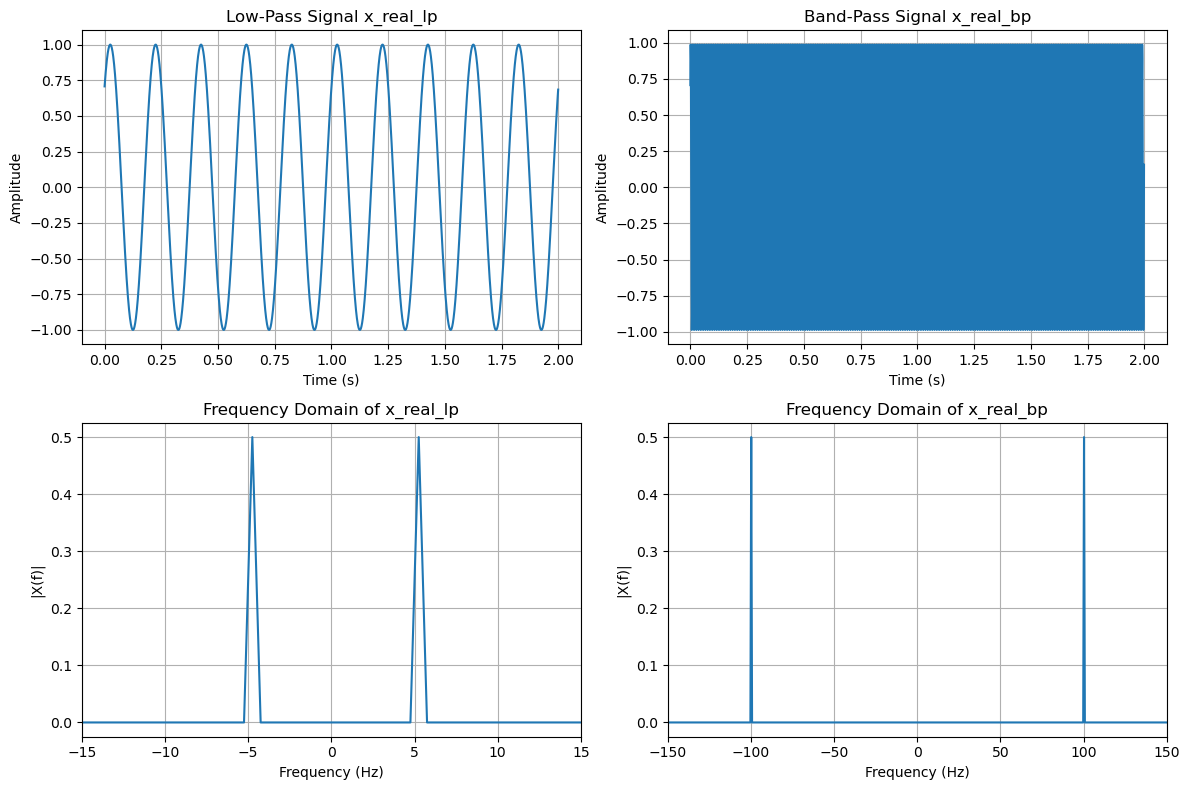

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift

# Define parameters
a = 1                  # Amplitude
omega_0 = 2 * np.pi * 5 # Baseband angular frequency (5 Hz -> 2*pi*5 rad/s)
f_0 = 1e2              # Carrier frequency (100 Hz)
theta = np.pi / 4      # Phase in radians
t = np.arange(0, 1, 0.001) # Time vector from 0 to 1 second with 1 ms sampling interval

# Generate the low-pass signal
x_real_lp = a * np.sin(omega_0 * t + theta)

# Carrier frequency to angular frequency for band-pass signal
omega_c = 2 * np.pi * f_0
x_real_bp = a * np.sin(omega_c * t + theta)

# Plot the low-pass and band-pass signals in the time domain
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x_real_lp)
plt.title('Low-Pass Signal x_real_lp')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, x_real_bp)
plt.title('Band-Pass Signal x_real_bp')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Extend the time vector for better frequency resolution
t = np.arange(0, 2, 0.001) # Time vector from 0 to 2 seconds

# Recalculate the signals with the extended time vector
x_real_lp = a * np.sin(omega_0 * t + theta)
x_real_bp = a * np.sin(omega_c * t + theta)

# Number of points in FFT
N = len(t)

# Frequency vector for FFT plots
f = np.linspace(-0.5, 0.5, N) * (1 / 0.001)  # Frequency vector in Hz

# FFT of the low-pass signal
X_real_lp_fft = fft(x_real_lp)
X_real_lp_fft_shifted = fftshift(X_real_lp_fft)  # Shift zero frequency to center

# FFT of the band-pass signal
X_real_bp_fft = fft(x_real_bp)
X_real_bp_fft_shifted = fftshift(X_real_bp_fft)  # Shift zero frequency to center

# Plot the time domain signals and their FFTs
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(t, x_real_lp)
plt.title('Low-Pass Signal x_real_lp')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t, x_real_bp)
plt.title('Band-Pass Signal x_real_bp')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

# Plot the frequency domain of low-pass and band-pass signals
plt.subplot(2, 2, 3)
plt.plot(f, np.abs(X_real_lp_fft_shifted) / N)
plt.title('Frequency Domain of x_real_lp')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.xlim([-15, 15])  # Limiting frequency axis for better visualization
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(f, np.abs(X_real_bp_fft_shifted) / N)
plt.title('Frequency Domain of x_real_bp')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.xlim([-150, 150])  # Adjust based on carrier frequency
plt.grid(True)

plt.tight_layout()
plt.show()


### Simulation: Bandpass Singal to Baseband Signal

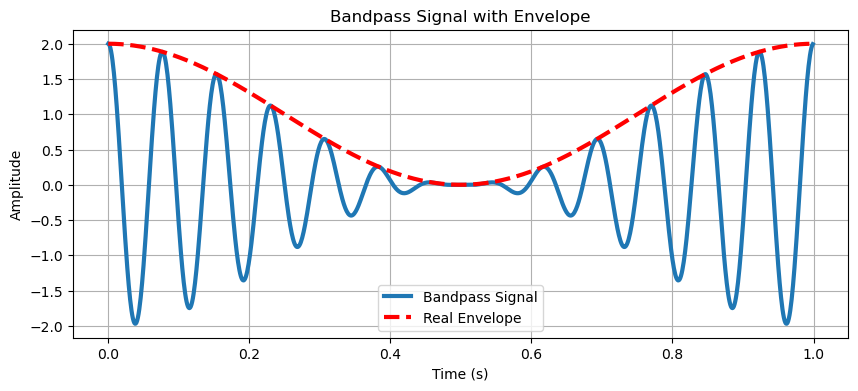

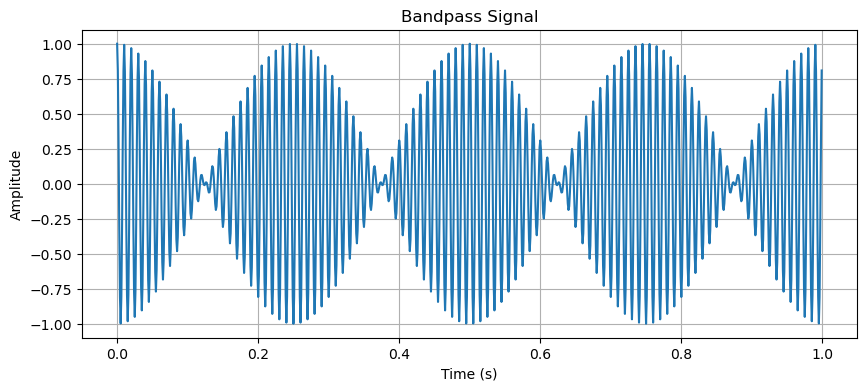

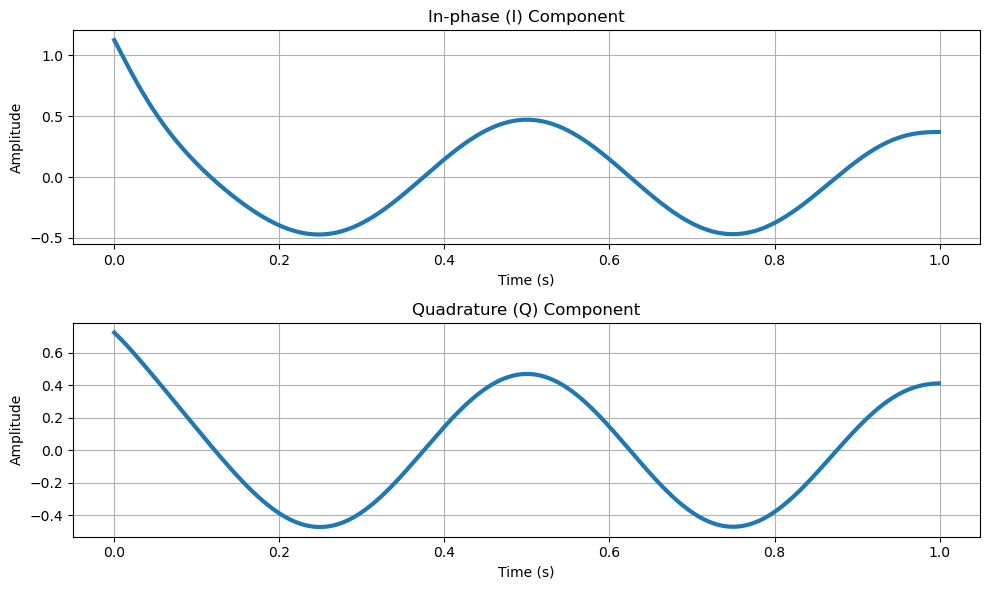

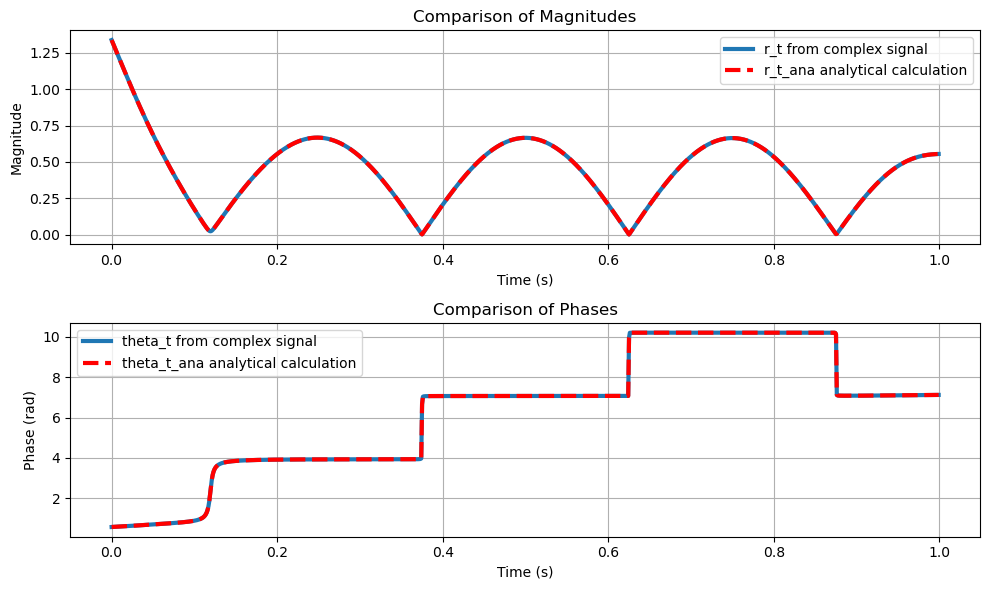

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, butter, filtfilt

# Part 1: Bandpass Signal with Envelope
# Define the time vector
t = np.arange(0, 1, 0.001)  # Time vector from 0 to 1 second with sampling interval

# Define the carrier and envelope frequencies
f0 = 13  # Carrier frequency in Hz
omega_0 = 1  # Envelope frequency in Hz

# Create the envelope signal (using a cosine for a smooth positive envelope)
envelope = 1 + np.cos(2 * np.pi * omega_0 * t)

# Create the carrier signal
carrier = np.cos(2 * np.pi * f0 * t)

# Generate the bandpass signal by multiplying the carrier with the envelope
bandpass_signal_demo = envelope * carrier

# Plot the bandpass signal and envelope
plt.figure(figsize=(10, 4))
plt.plot(t, bandpass_signal_demo, linewidth=3, label='Bandpass Signal')
plt.plot(t, envelope, 'r--', linewidth=3, label='Real Envelope')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Bandpass Signal with Envelope')
plt.legend()
plt.grid(True)
plt.show()

# Part 2: Bandpass to Lowpass Demodulation

# Define parameters
f0 = 100  # Carrier frequency in Hz
omega_0 = 2  # Message frequency in Hz
Fs = 1000  # Sampling frequency in Hz
t = np.arange(0, 1, 1/Fs)  # Time vector

# Generate a bandpass signal
A = 1  # Amplitude of the message
x_t_real_lp = A * np.cos(2 * np.pi * omega_0 * t)  # Real lowpass signal

x_t_bp = x_t_real_lp * np.cos(2 * np.pi * f0 * t)  # Bandpass signal (modulating onto the carrier)

# Plot the bandpass signal
plt.figure(figsize=(10, 4))
plt.plot(t, x_t_bp)
plt.title('Bandpass Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Generate the analytic signal (complex signal with Hilbert transform)
x_hat = hilbert(x_t_bp)

# Mix down the analytic signal to baseband
xi_t = np.real(x_t_bp * np.cos(2 * np.pi * f0 * t) + x_hat * np.sin(2 * np.pi * f0 * t))
xq_t = np.real(x_hat * np.cos(2 * np.pi * f0 * t) - x_t_bp * np.sin(2 * np.pi * f0 * t))

# Low-pass filter to remove the high-frequency components (around 2*f0)
b, a = butter(2, 2*omega_0/(Fs/2))  # Butterworth filter design
I = filtfilt(b, a, xi_t)  # Filtered In-phase component
Q = filtfilt(b, a, xq_t)  # Filtered Quadrature component

# Form the complex lowpass signal
complex_lowpass_equivalent = I + 1j * Q

# Plot I and Q components
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, I, linewidth=3)
plt.title('In-phase (I) Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, Q, linewidth=3)
plt.title('Quadrature (Q) Component')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate r_t and theta_t from the complex lowpass signal
r_t = np.abs(complex_lowpass_equivalent)  # Magnitude
theta_t = np.angle(complex_lowpass_equivalent)  # Phase

# Calculate r_t_ana and theta_t_ana using the filtered I and Q components
r_t_ana = np.sqrt(I**2 + Q**2)  # Analytical magnitude calculation
theta_t_ana = np.arctan2(Q, I)  # Analytical phase calculation

# Plot magnitude and phase of the complex lowpass signal
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, r_t, linewidth=3, label='r_t from complex signal')
plt.plot(t, r_t_ana, 'r--', linewidth=3, label='r_t_ana analytical calculation')
plt.title('Comparison of Magnitudes')
plt.xlabel('Time (s)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t, np.unwrap(theta_t), linewidth=3, label='theta_t from complex signal')
plt.plot(t, np.unwrap(theta_t_ana), 'r--', linewidth=3, label='theta_t_ana analytical calculation')
plt.title('Comparison of Phases')
plt.xlabel('Time (s)')
plt.ylabel('Phase (rad)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
